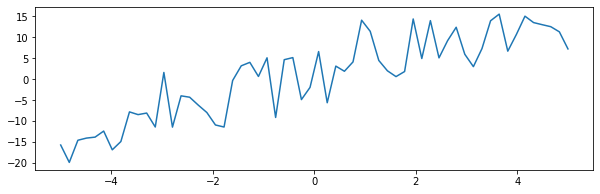

In [45]:
import probpy as pp
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, 60)
y = x * 3 + 5 * pp.normal.sample(mu=0, sigma=1, size=60)


plt.figure(figsize=(10, 3))
plt.plot(x, y)
plt.show()


In [49]:
import matplotlib.animation as animation
from IPython.display import HTML

fig, (ax, bx) = plt.subplots(2, 1, figsize=(13, 8))
line, = ax.plot(x, np.zeros_like(x))

bx.set_ylabel("M", fontsize=15)
bx.set_xlabel("K", fontsize=15)

mesh = 10
p = np.linspace(-2, 5, mesh)
X, Y = np.meshgrid(p, p)

Z = np.concatenate([X.reshape(-1, 1), Y.reshape(-1, 1)], axis=1)

seen = []
scat = ax.scatter([], [])

ax.set_ylim([y.min(), y.max()])


prior = pp.multivariate_normal.med(mu=np.zeros(2), sigma=np.eye(2) * 10)
likelihood = pp.unilinear.med(sigma=1.0)


def update(data):
    global prior, likelihood, x, Z
        
    prior = pp.parameter_posterior(data, likelihood=likelihood, priors=prior)
    
    parameters = bx.contourf(X, Y, prior.p(Z).reshape(mesh, mesh)) 
    predictions = prior.mu[0] * x + prior.mu[1]
    line.set_ydata(predictions)
    
    seen.append((data[1], data[0]))
    scat.set_offsets(seen)
    
    return parameters.collections + [line, scat]

def init():
    global x
    line.set_ydata(np.zeros_like(x))
    return line, 


def data_generator():
    global x, y
    for i in range(x.size):
        yield (y[i], x[i])
    

ani = animation.FuncAnimation(fig, update, data_generator, init_func=init,
                              interval=400, blit=True)


plt.close()

HTML(ani.to_html5_video())
